---
# 문제정의
### 동적 계획법을 사용하여 배낭채우기 알고리즘을 작성하라

---
# 알고리즘 설명
### 물건의 가치와 무게를 리스트로 입력받고, 배낭의 최대 용량 W를 입력받아 동적 계획법을 사용하여 배낭에 담을 수 있는 물건들의 최대 가치를 계산하고 dp 테이블을 사용하여 점진적으로 최적해를 구하고, 최종 결과를 반환하는 알고리즘

---
# 손으로 푼 예제
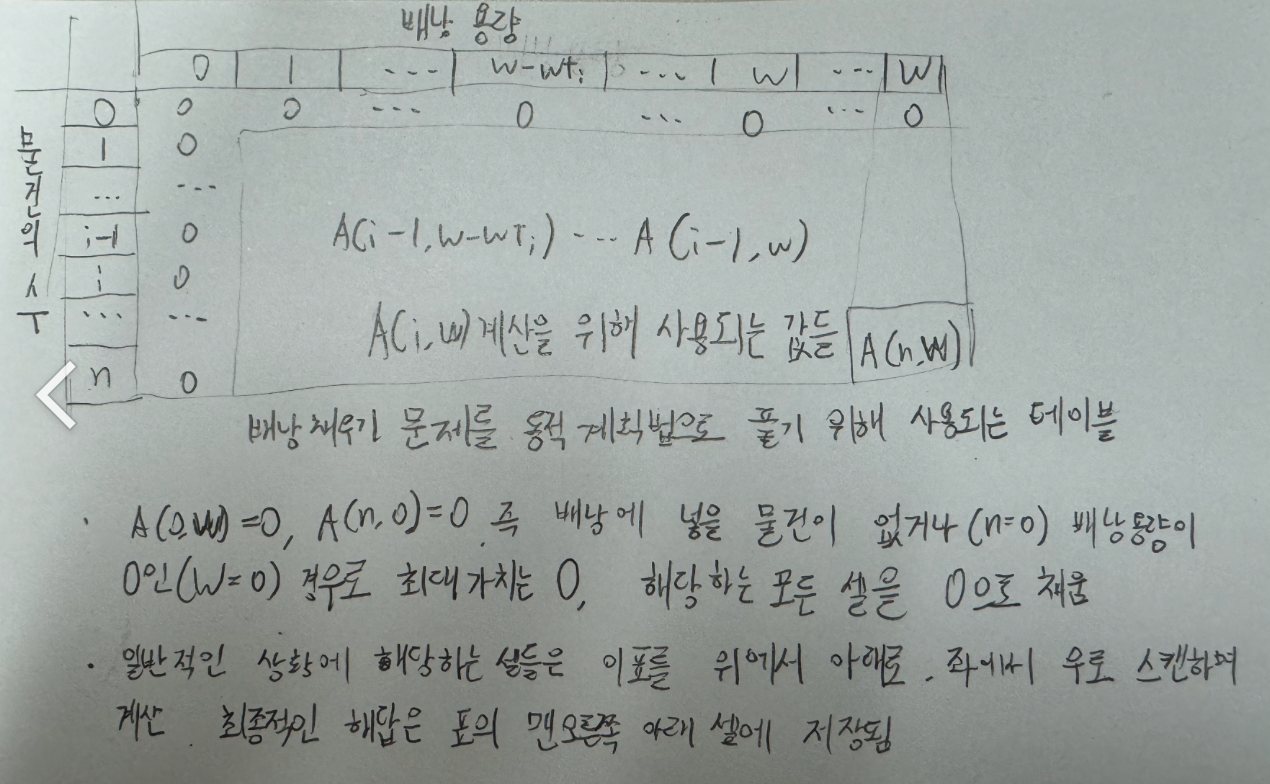

---
# 코드 개요
### (n+1)x(W+1) 크기의 2차원리스트를 생성하고 모든 항목을 0으로 초기화
### 만약 i번째 물건이 용량 초과시 이 물건을 제외한 물건을 고려한 경우의 최대 가치를 구하면 됨
### 그렇지 않다면 이항목을 넣는 경우의 가치합과 넣지 않는 경우의 가치합을 계산함. 이들 중에서 큰값을 선택해 A[i][w]에 저장
### 최종적으로 A[n][W]에 결과 저장, 이를 반환함

In [1]:
def knapSack_dc(W, wt, val, n):
    if n == 0 or W == 0:
        return 0
    
    if wt[n-1] > W:
        return knapSack_dc(W, wt, val, n-1)
    else:
        valWithout = knapSack_dc(W, wt, val, n-1)
        valWith = val[n-1] + knapSack_dc(W - wt[n-1], wt, val, n-1)
        return max(valWith, valWithout)
    

def knapSack_dp(W, wt, val, n):
    A = [[0 for x in range(W+1)] for x in range(n+1)]

    for i in range(1, n+1):
        for w in range(1, W+1):
            if wt[i-1] > w:
                A[i][w] = A[i-1][w]
            else:
                valWith = val[i-1] + A[i-1][w - wt[i-1]]
                valWithout = A[i-1][w]
                A[i][w] = max(valWith, valWithout)
    
    return A[n][W]

---
# 테스트 코드

In [2]:
val = [60, 100, 190, 120, 200, 150]
wt = [2, 5, 8, 4, 7, 6]
W = 18
n = len(val)

print("0-1배낭문제(분할 정복):", knapSack_dc(W, wt, val, n))
print("0-1배낭문제(동적 계획):", knapSack_dp(W, wt, val, n))


0-1배낭문제(분할 정복): 480
0-1배낭문제(동적 계획): 480


---
# 수행결과
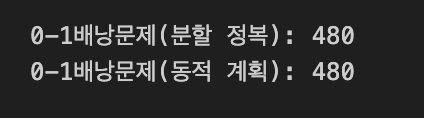

---
# 복잡도 분석
### 시간복잡도: 이중루프를 사용하고 외부루프가 최대 n번, 내부 루프가 W번 반복된다. 따라서 전체 시간 복잡도는 O(nW)이다
### 공간복잡도: 부분 문제의 해를 저장할 테이블을 위해 O(nW)의 추가적인 공간을 사용한다

---
# 조별 협력 내용
### 팀원과 협동하여 문제를 해결하였고 함께 검토하였음